## Import Necessary Libraries

In [504]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [359]:
df = pd.read_csv('terrorist_attacks_india.csv',encoding = 'ISO-8859-1')

In [360]:
df.head(3)

,#,Date,Incidents & Description,Location,People Killed,Injured,Status of the Case
0,1,08-Jun-80,Mandai massacre,Tripura,500,NaN,NaN
1,2,02-Aug-84,Meenambakkam bomb blast,Tamil Nadu,30,25,Verdict given
2,3,07-Jul-87,1987 Haryana killings,Haryana,36,60,NaN


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        110 non-null    int64 
 1   Date                     110 non-null    object
 2   Incidents & Description  110 non-null    object
 3   Location                 108 non-null    object
 4   People Killed            107 non-null    object
 5   Injured                  87 non-null     object
 6   Status of the Case       13 non-null     object
dtypes: int64(1), object(6)
memory usage: 6.1+ KB


## EDA (Exploratory Data Analysis)

In [362]:
data = df['Location'].value_counts()

In [363]:
import folium

In [364]:
m = folium.Map(location = [20,0])

In [365]:
folium.Choropleth(geo_data='india_district.geojson',
                 name = 'choropleth',
                 data = data ,
                 key_on = 'feature.properties.NAME_1',  # This matches the 'NAME_1' property in GeoJSON
                 fill_color='YlGn',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='Value',
                 columnns = ['City','IntensityOfAttacks']).add_to(m)

In [366]:
folium.LayerControl().add_to(m)

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\3998551825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, palette='coolwarm')


Text(100.84722222222221, 0.5, 'No. Of Terrorist Attacks')

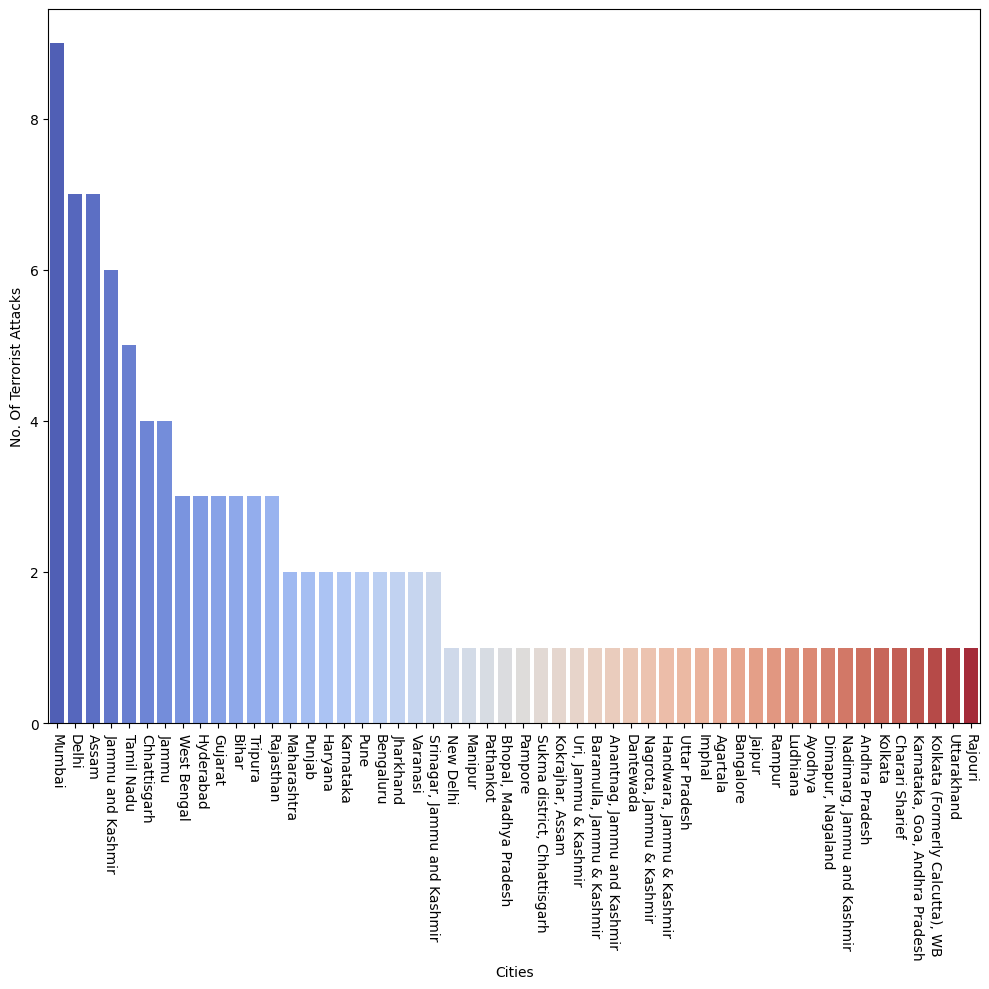

In [367]:
plt.figure(figsize=(10,10))
sns.barplot(data = data, palette='coolwarm')
plt.xticks(rotation = 270)
plt.tight_layout()
plt.xlabel('Cities')
plt.ylabel('No. Of Terrorist Attacks')

In [368]:
df.head(2)

,#,Date,Incidents & Description,Location,People Killed,Injured,Status of the Case
0,1,08-Jun-80,Mandai massacre,Tripura,500,NaN,NaN
1,2,02-Aug-84,Meenambakkam bomb blast,Tamil Nadu,30,25,Verdict given


In [369]:
df.groupby('Location').count()

,#,Date,Incidents & Description,People Killed,Injured,Status of the Case
Location,,,,,,
Agartala,1,1,1,1,1,0
"Anantnag, Jammu and Kashmir",1,1,1,1,1,0
Andhra Pradesh,1,1,1,1,1,0
Assam,7,7,7,7,5,0
Ayodhya,1,1,1,1,0,0
Bangalore,1,1,1,1,1,1
"Baramulla, Jammu & Kashmir",1,1,1,1,0,0
Bengaluru,2,2,2,2,2,0
"Bhopal, Madhya Pradesh",1,1,1,0,1,0


In [370]:
df[df['Location'] =='Mumbai']['People Killed'].astype(int).sum()

740

In [371]:
df["People Killed"] = pd.to_numeric(df["People Killed"],errors='coerce')
df["Injured"] = pd.to_numeric(df["Injured"],errors='coerce')

In [372]:
df.dtypes

#                            int64
Date                        object
Incidents & Description     object
Location                    object
People Killed              float64
Injured                    float64
Status of the Case          object
dtype: object

In [373]:
data2 = df.groupby('Location')[['People Killed', 'Injured']].sum().reset_index()

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\1626541759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data2 ,y='Location',x = 'People Killed',palette='coolwarm',orient='h')


Text(-141.90277777777777, 0.5, 'Location')

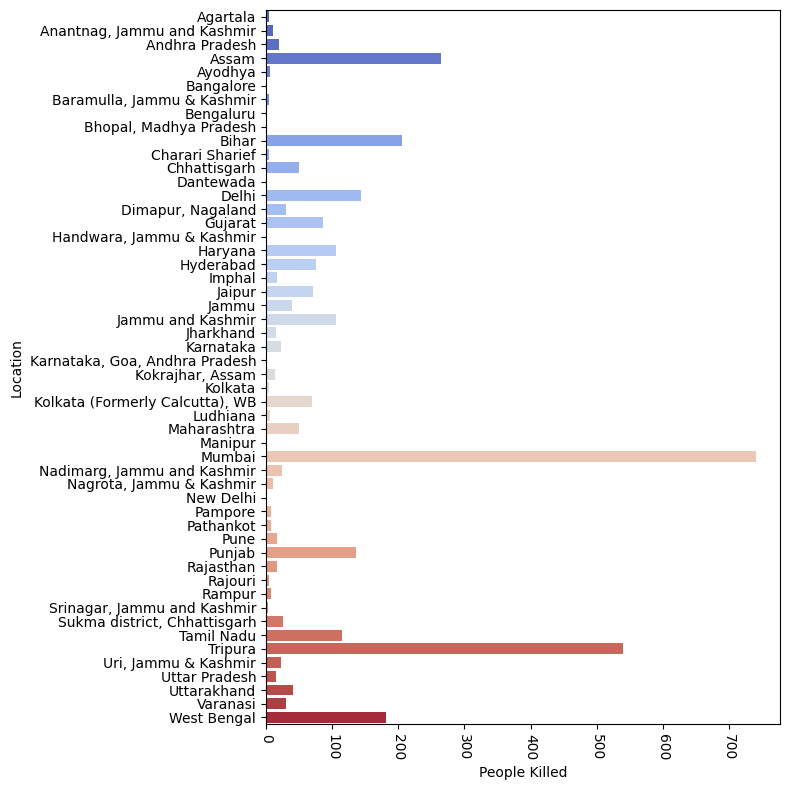

In [380]:
plt.figure(figsize=(8,8))
sns.barplot(data = data2 ,y='Location',x = 'People Killed',palette='coolwarm',orient='h')
plt.xticks(rotation = 270)
plt.tight_layout()
plt.xlabel('People Killed')
plt.ylabel('Location')

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\1869937570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data2 ,y='Location',x = 'Injured',palette='coolwarm',orient='h')


Text(-141.90277777777777, 0.5, 'Location')

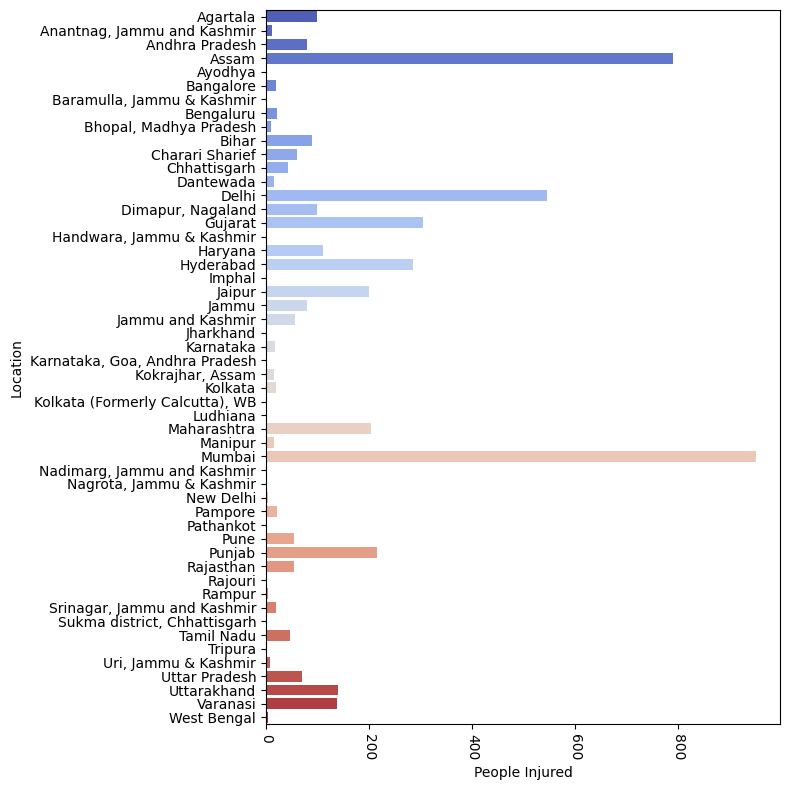

In [381]:
plt.figure(figsize=(8,8))
sns.barplot(data = data2 ,y='Location',x = 'Injured',palette='coolwarm',orient='h')
plt.xticks(rotation = 270)
plt.tight_layout()
plt.xlabel('People Injured')
plt.ylabel('Location')

In [385]:
df.drop(['#'],inplace = True,axis = 1)

In [403]:
df['Date'][11] = '05-December-1993'
df['Date'][17] = '06-july-2000'
df['Date'][88] = '01-May-2014'
df['Date'][93] = '09-june-2015'
# Corrected the Wrong Format at these Places

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\3622389626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][11] = '05-December-1993'
C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\3622389626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][17] = '06-july-2000'
C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_6320\3622389626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][88] = '01-Ma

In [405]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [419]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()

In [430]:
type(df['day_name'].value_counts())

pandas.core.series.Series

In [435]:
new_df = pd.DataFrame()

In [436]:
new_df['day_name_vc'] = df['day_name'].value_counts() 
new_df['day_vc'] = df['day'].value_counts() 
new_df['year_vc'] = df['year'].value_counts() 
new_df['month_vc'] = df['month'].value_counts()

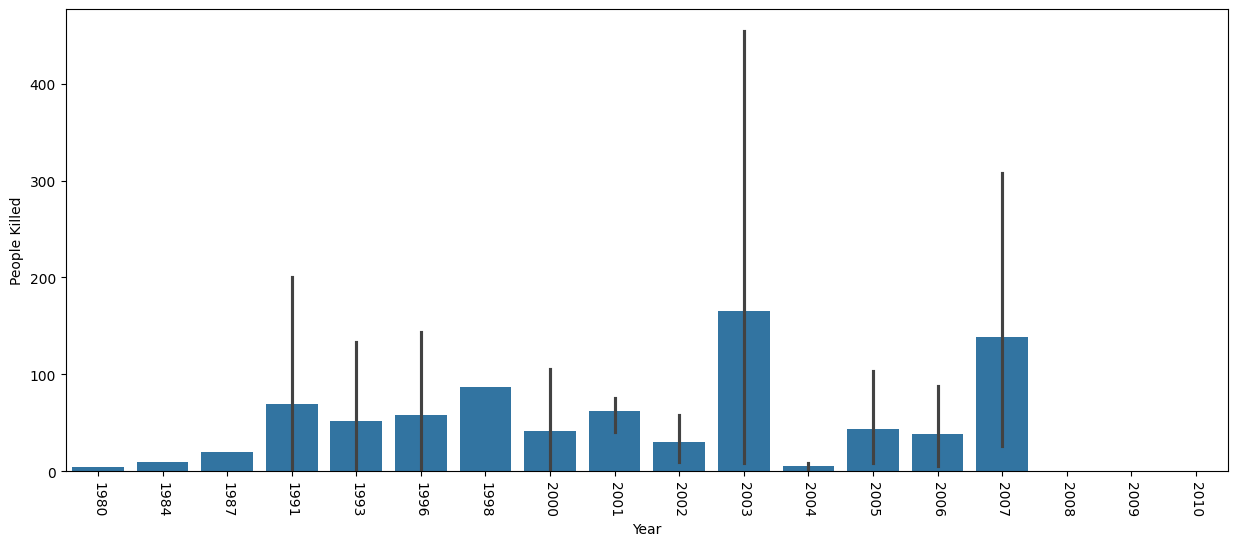

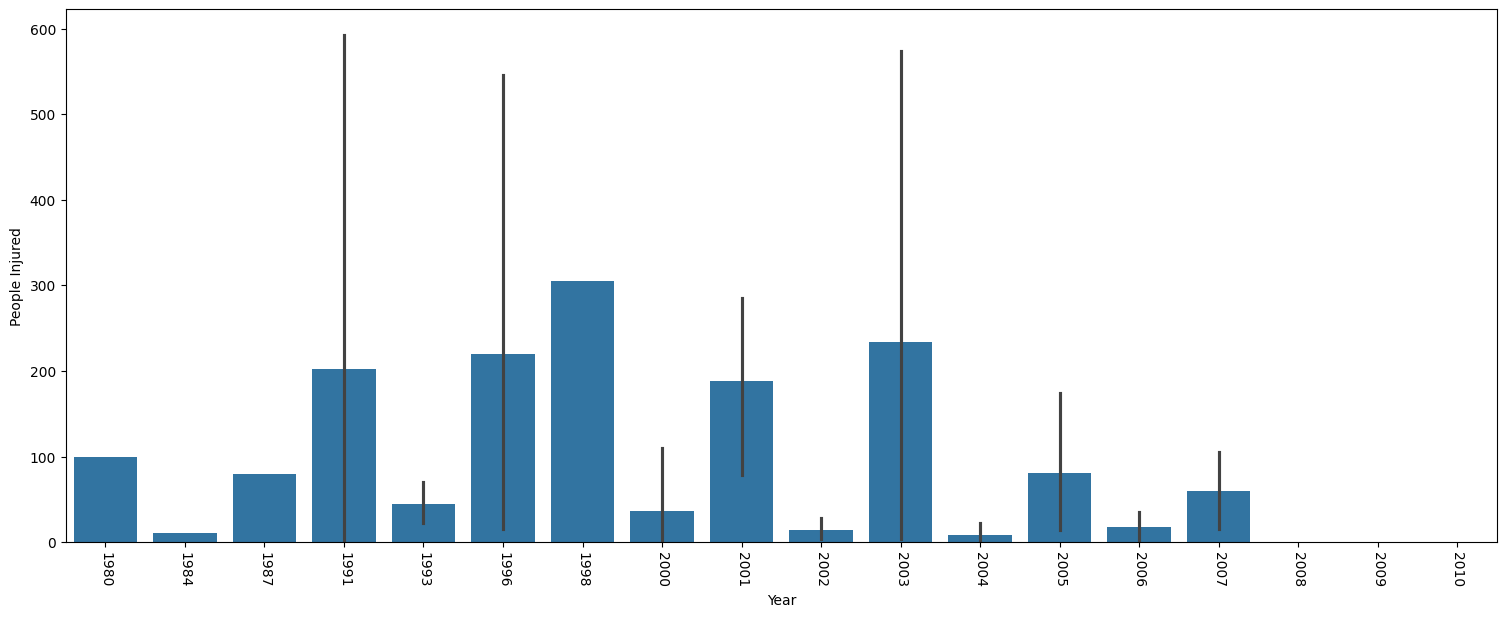

In [497]:
plt.figure(figsize = (15,6))
plt.xticks(rotation = 270)
sns.barplot(x =df['year'][:70] , y =data2['People Killed'] ,orient='v')
plt.ylabel('People Killed')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(15,6))
plt.xticks(rotation = 270)
plt.tight_layout()
plt.ylabel('People Injured')
plt.xlabel('Year')
sns.barplot(x =df['year'][0:70] , y =data2['Injured'])
plt.show()

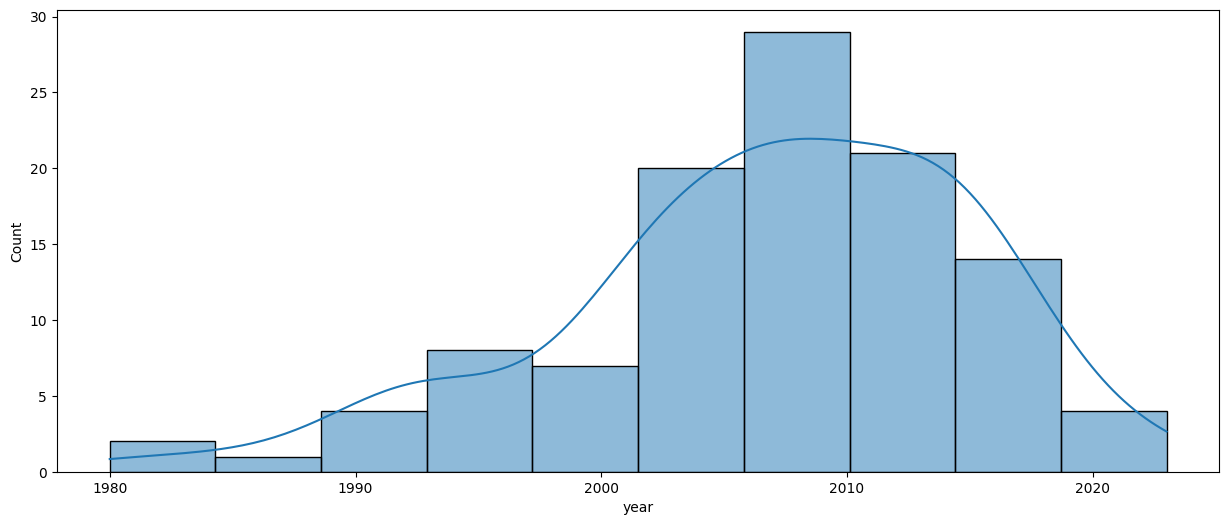

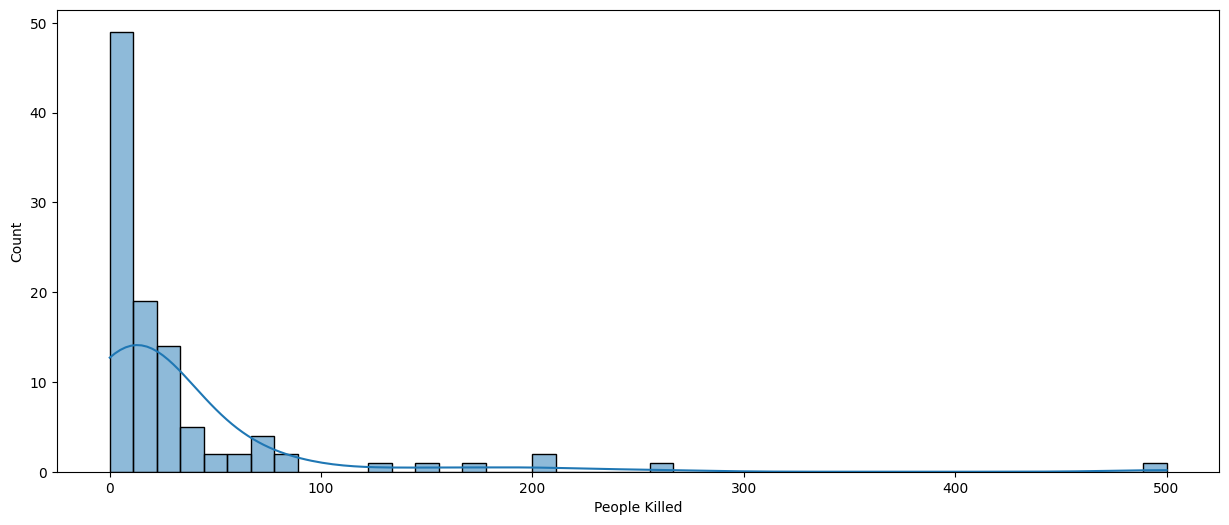

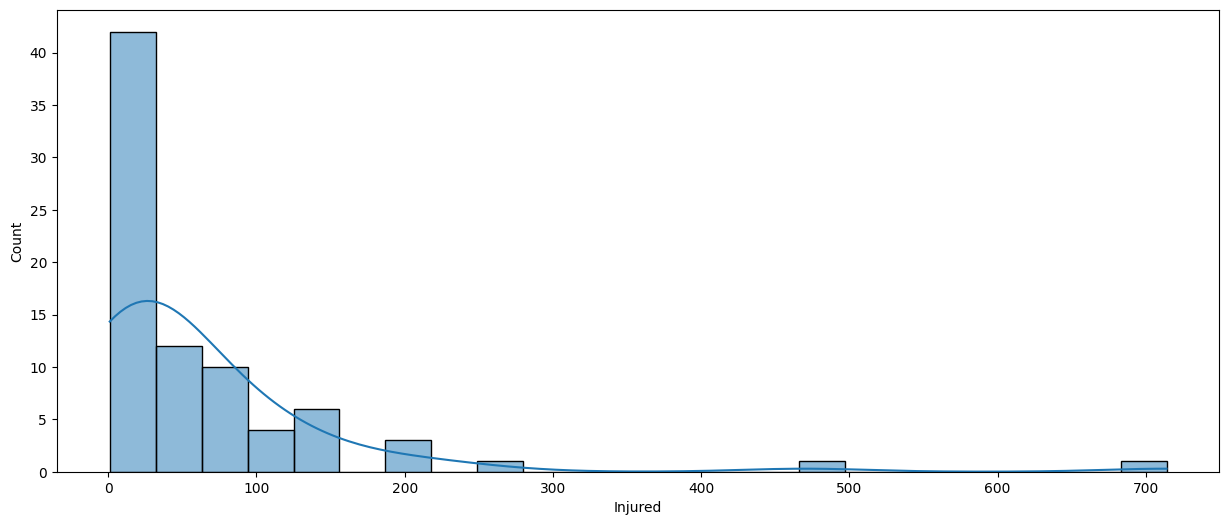

In [501]:
## Distribution Of Some Columns

plt.figure(figsize = (15,6))
sns.histplot(df['year'],kde = True)
plt.show()

plt.figure(figsize = (15,6))
sns.histplot(df['People Killed'],kde = True)
plt.show()


plt.figure(figsize = (15,6))
sns.histplot(df['Injured'],kde = True)
plt.show()

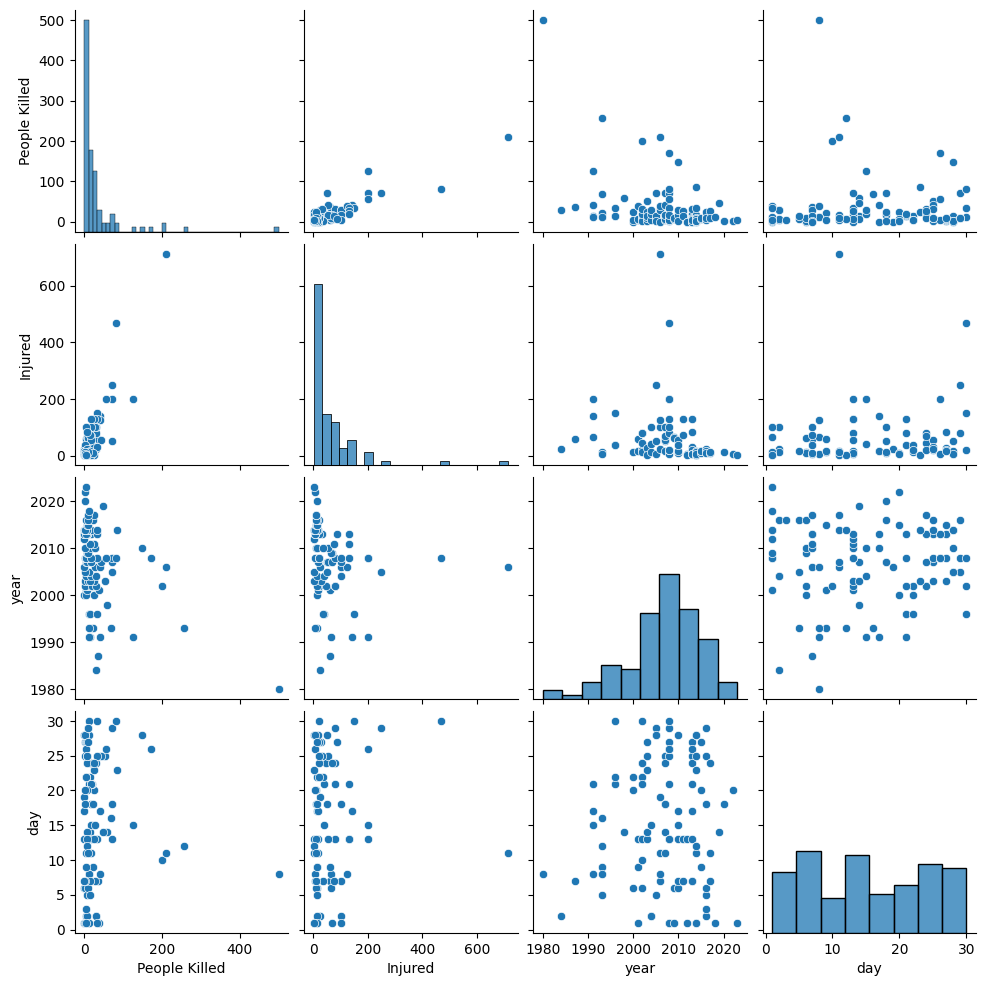

In [503]:
sns.pairplot(df)

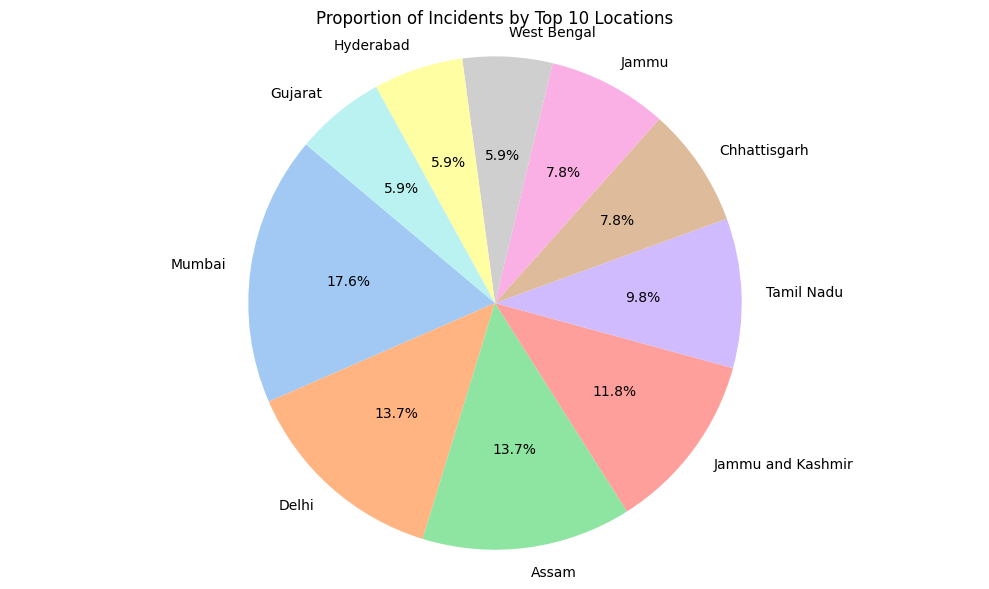

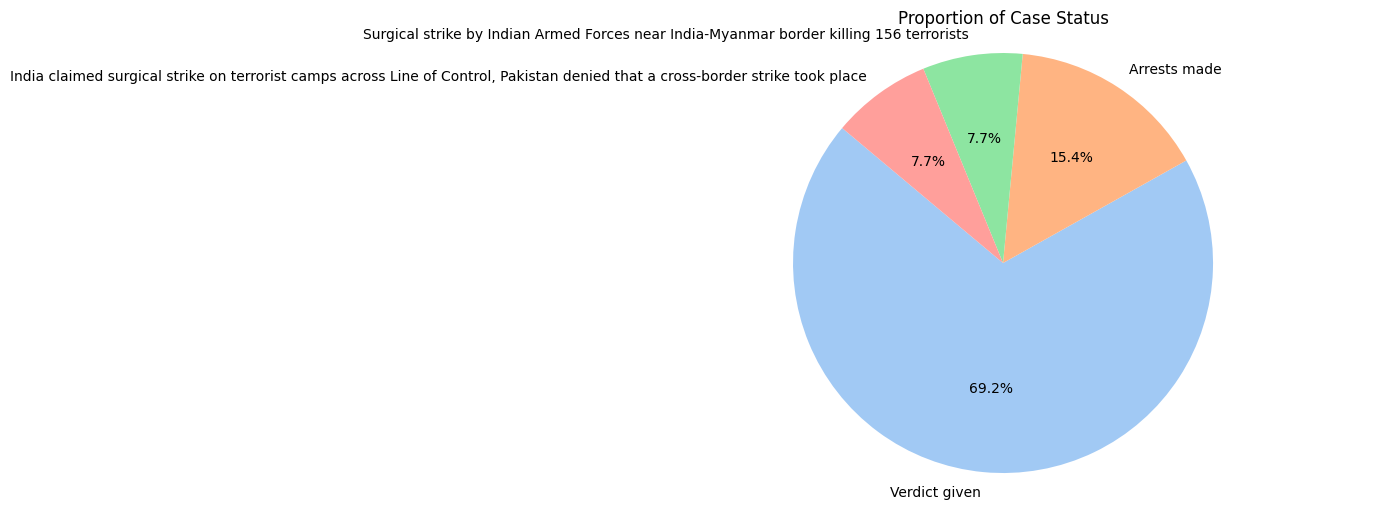

In [516]:
top_10_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.pie(top_10_locations, labels=top_10_locations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Incidents by Top 10 Locations')
plt.axis('equal')  
plt.tight_layout()
plt.show()

status_counts = df['Status of the Case'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Case Status')

plt.xticks(rotation = 270)
plt.axis('equal')  
plt.show()

<font size = 11 > Dhanyawaad !  :) </font>









